In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\hemanth kumar\\Desktop\\A-Z data sets\\P14-Part2-Regression\\P14-Part2-Regression\\Section 8 - Polynomial Regression\\Python\\Position_Salaries.csv')

In [3]:
df=df.drop('Position',axis=1)
x=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x.reshape(-1,1))
y=sc_y.fit_transform(y.reshape(-1,1))

    ## note: here, feature scaling is neccesary, because SVR regresser don't have built in feature scaling.

In [5]:
from sklearn.svm import SVR
svr_reg=SVR()
svr_reg.fit(x,y)

C:\Users\hemanth kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0, 0.5, 'salary')

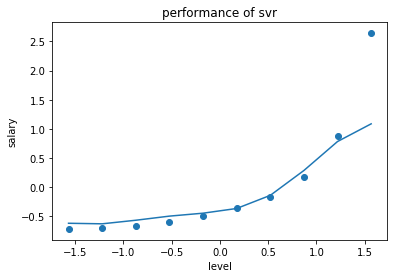

In [6]:
plt.scatter(x,y)
plt.plot(x,svr_reg.predict(x))
plt.title('performance of svr')
plt.xlabel('level')
plt.ylabel('salary')

## NOTE: here the ceo salary is far away from the prediction line, because here the ceo is considered as outlier.

In [7]:
p=np.array(6.5)##  we just need to be transformed since it is already fot fitted to the sc_x object.
p=sc_x.transform(p.reshape(1,-1))## note: here we need to feture scale since all the variables are earlier feature scaled
svr_reg.predict(p) ## this gives feature scaled value 

array([-0.27861589])

In [9]:
## we need to inverse transform to get the value in our acual scale
y_pred=sc_y.inverse_transform(svr_reg.predict(p))
y_pred

array([170370.0204065])